In [11]:
from PIL import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np

import sys
sys.path.append('..')
from utils import vis2arr, ir2arr

from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

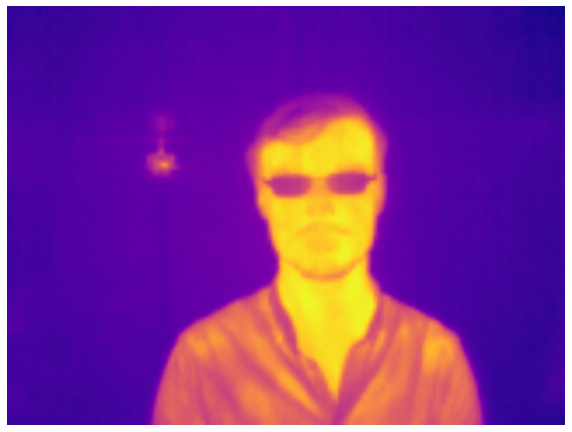

In [13]:
ir_img = Image.open("../images/test_images/1594774387ir.png")
ir_arr = ir2arr(ir_img)
plt.axis('off')
plt.imshow(ir_arr, cmap='plasma')

In [99]:
def detect_ir(ir_arr, thr):
    """
    Detects objects above thr temperature in ir array
    :param ir_arr: ir array in deg. C
    :param thr: threshold temperature in deg. C
    """
    
    mask = ir_arr>thr
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    bboxes = []
    for c in contours:
        polygon = cv2.approxPolyDP(c, 3, True)
        bbox = cv2.boundingRect(polygon)
        bboxes.append(bbox)
    
    return bboxes

def drop_small_bboxes(bboxes, min_size):
    """
    :param min_size: min size of bb area [px]
    """
    good = []
    for (x, y, dx, dy) in bboxes:
        if dx*dy > min_size:
            good.append((x, y, dx, dy))
    return good

def overlay_bboxes(arr, bboxes):
    
    arr = cv2.normalize(arr, None, 0, 255, cv2.NORM_MINMAX)
    arr = arr.astype(np.uint8)
    arr = cv2.cvtColor(arr, cv2.COLOR_GRAY2RGB)
    
    COL = (255, 255, 0)
    for (x, y, dx, dy) in bboxes:
        p1 = (x,y)
        p2 = (x+dx, y+dy)
        cv2.rectangle(arr,
                      p1,
                      p2,
                      color=COL,
                      thickness=2)
    return arr

In [139]:
?cv2.findContours

In [140]:
mask = ir_arr>42
contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

bboxes = []
for c in contours:
    polygon = cv2.approxPolyDP(c, 3, True)
    bbox = cv2.boundingRect(polygon)
    bboxes.append(bbox)
    

In [141]:
arr_rgb = cv2.cvtColor(ir_arr, cv2.COLOR_GRAY2RGB)
arr_rgb = cv2.normalize(arr_rgb, None, 0, 255, cv2.NORM_MINMAX)
arr_rgb = arr_rgb.astype(np.uint8)

In [180]:
import random

COLORS = [
    (0, 0, 255),
    (0, 127, 0),
    (255, 0, 0),
    (0, 191, 191.25),
    (191, 0, 191.25),
    (191, 191, 0)
]

arr_contours = arr_rgb.copy()

for contour in contours:
    cv2.drawContours(arr_contours, contour, -1, random.choice(COLORS), 10)

In [101]:
bboxes_all = detect_ir(ir_arr, 42)
bboxes_good = drop_small_bboxes(bboxes_all, min_size=10000)

arr_all_boxes = overlay_bboxes(ir_arr.copy(), bboxes_all)
arr_good_boxes = overlay_bboxes(ir_arr.copy(), bboxes_good)

plt.imshow(arr_all_boxes)

In [117]:
ir_arr

array([[39.46, 39.46, 39.46, ..., 38.9 , 38.9 , 38.9 ],
       [39.46, 39.46, 39.46, ..., 38.9 , 38.9 , 38.9 ],
       [39.46, 39.46, 39.46, ..., 38.9 , 38.9 , 38.9 ],
       ...,
       [39.68, 39.68, 39.68, ..., 39.33, 39.33, 39.33],
       [39.68, 39.68, 39.68, ..., 39.33, 39.33, 39.33],
       [39.68, 39.68, 39.68, ..., 39.33, 39.33, 39.33]], dtype=float32)

FileNotFoundError: [Errno 2] No such file or directory: '~/tmp/fig.png'

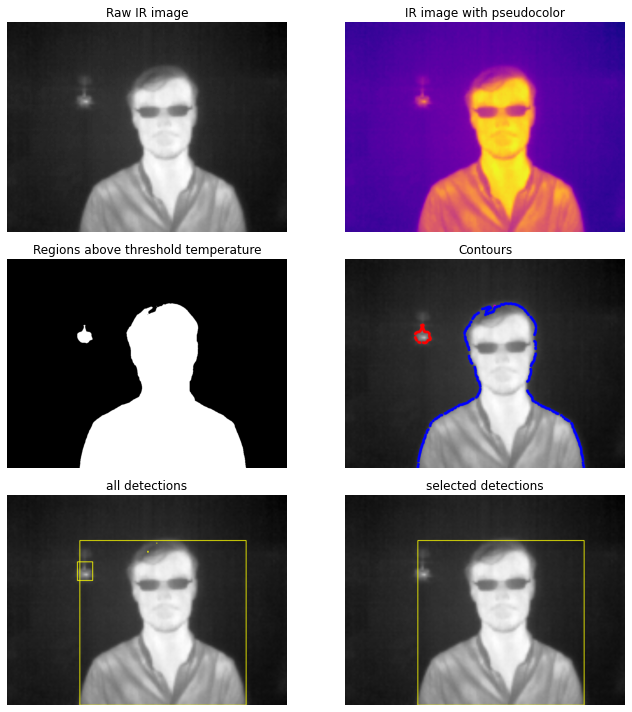

In [185]:
fig, axs = plt.subplots(3, 2)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

axs[0, 0].imshow(ir_arr, cmap='gray')
axs[0, 0].set_title('Raw IR image')
axs[0, 1].imshow(ir_arr, cmap='plasma')
axs[0, 1].set_title('IR image with pseudocolor')

axs[1, 0].imshow(mask, cmap='binary_r')
axs[1, 0].set_title('Regions above threshold temperature')

axs[1, 1].imshow(arr_contours)
axs[1, 1].set_title('Contours')

axs[2, 0].imshow(arr_all_boxes)
axs[2, 0].set_title('all detections')
axs[2, 1].imshow(arr_good_boxes)
axs[2, 1].set_title('selected detections')




# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set_axis_off()
    
plt.tight_layout()
plt.savefig('~/tmp/fig.png')

In [189]:
fig.savefig('fig.png')